# Лабораторна робота №4
## Обробка зображень та робота з наборами файлів цифрових зображень
<br /><br/>
### Виконав
### студентка групи КН-221а
### Єфіменко Анастасія Миколаївна
### Перевірив
### асистент кафедри
### Звєрцев Герман Олександрович
<br /><br/><br/><br/>
## Мета роботи 
**Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.**

## Хід роботи
**Завдання 1. Робота з набором файлів.**
<ol>
    <li>Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.</li>
    <li>Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:
        <ul>
            <li>ім’я файлу;</li>
            <li>кольорову модель;</li>
            <li>формат;</li>
            <li>кількість каналів у зображенні;</li>
            <li>розмір файлу у мегабайтах байтах, округлених до двох знаків після коми;</li>
            <li>ширину картинки;</li>
            <li>висоту картинки;</li>
            <li>повний шлях до файлу;</li>
            <li>зменшене зображення.</li>
        </ul></li>
</ol>


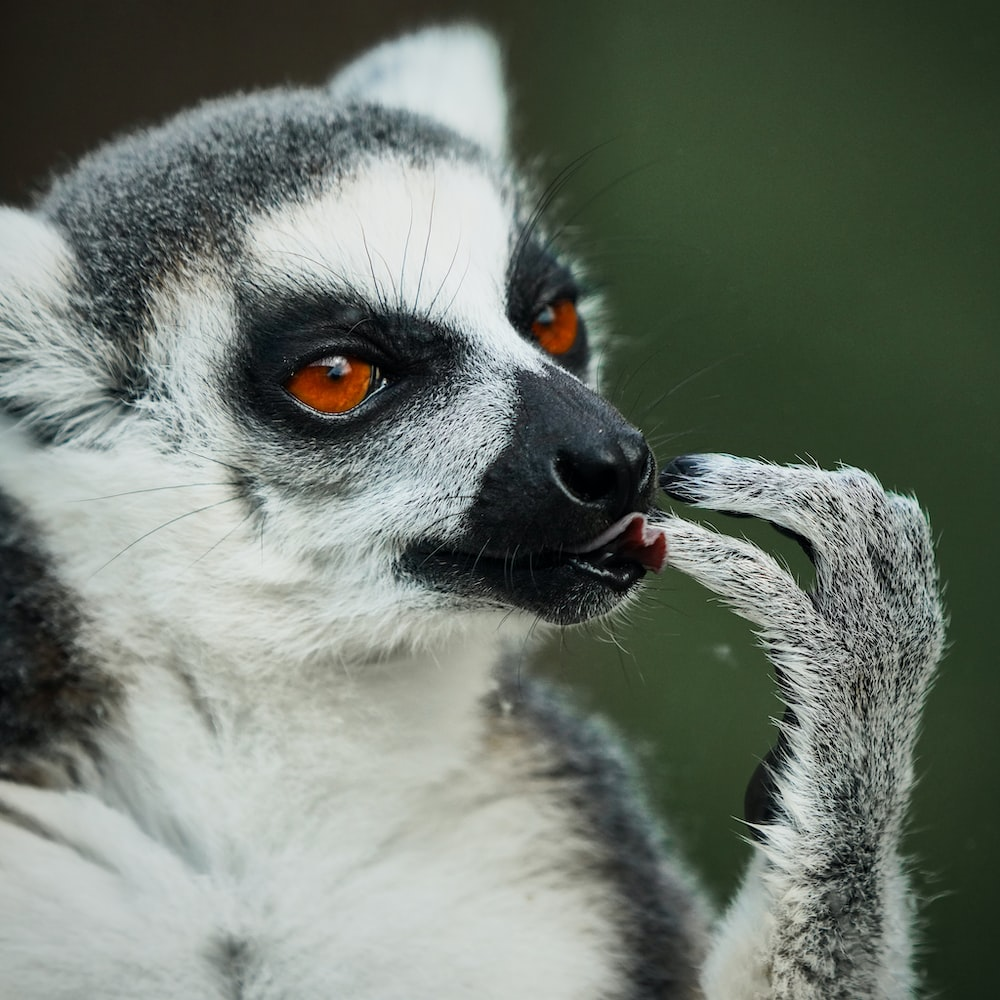
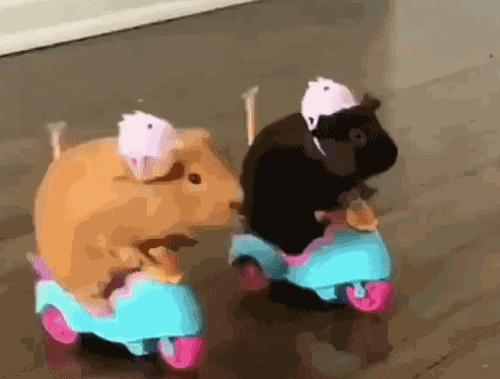
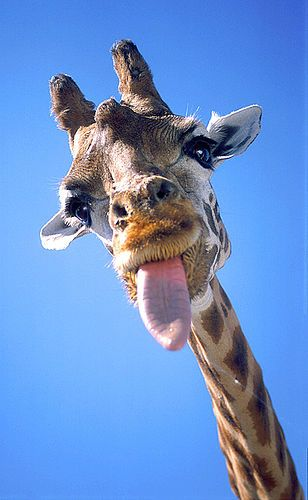
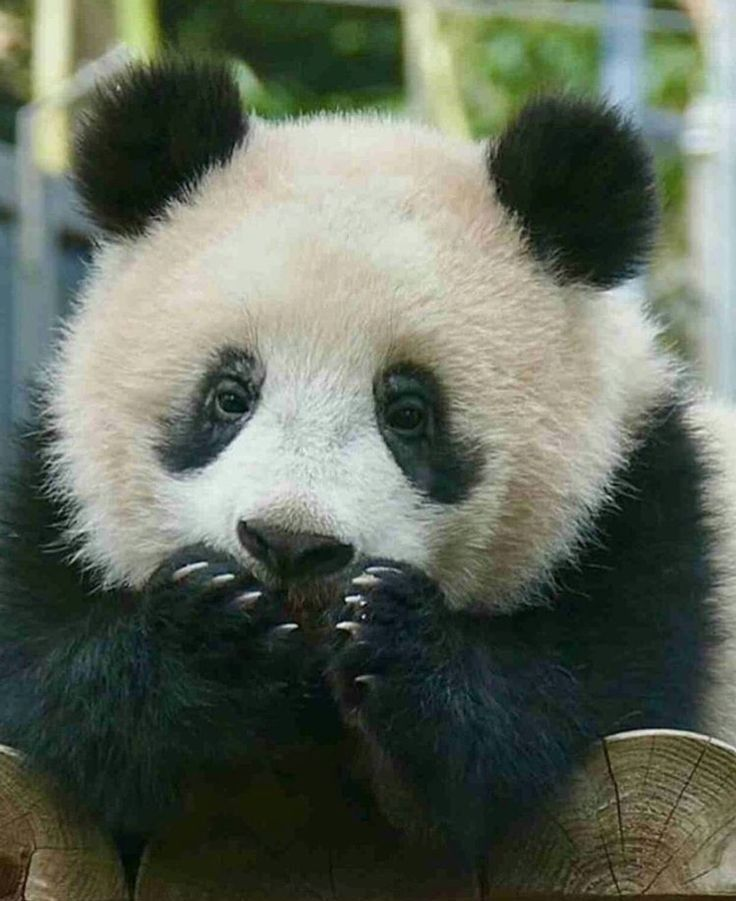
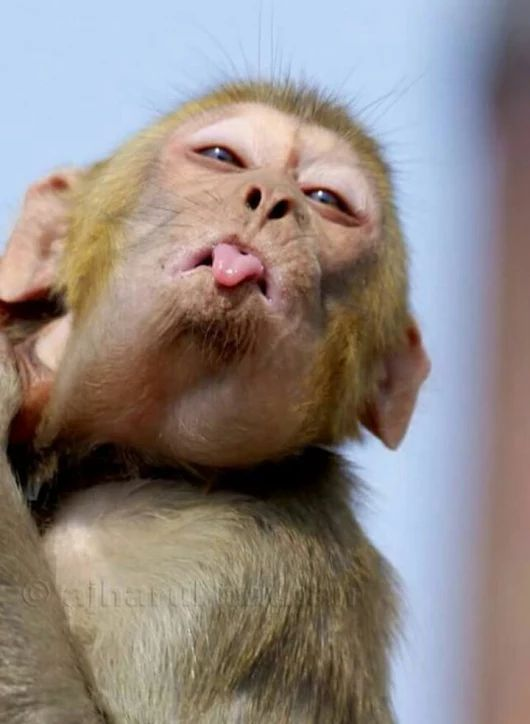
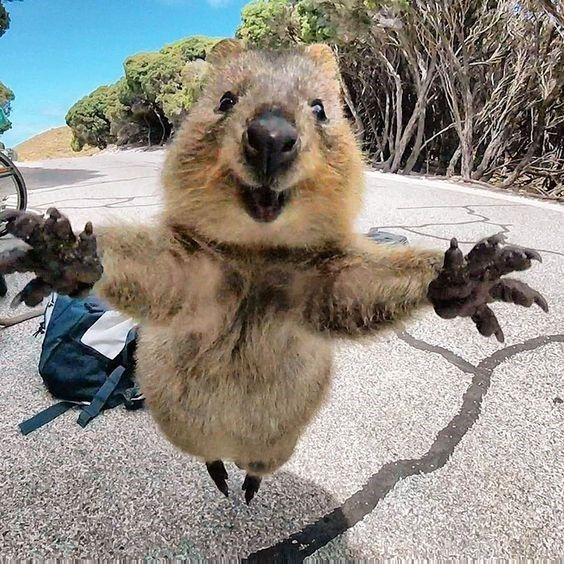
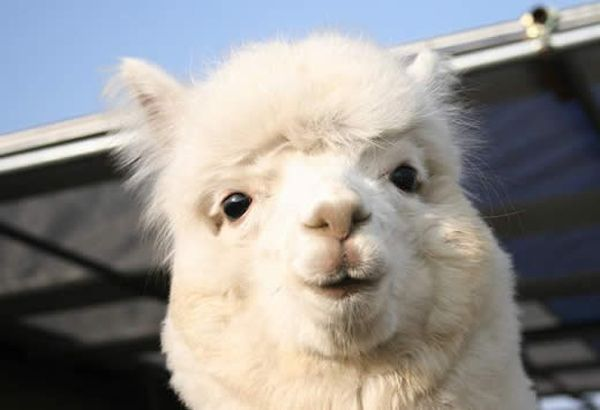
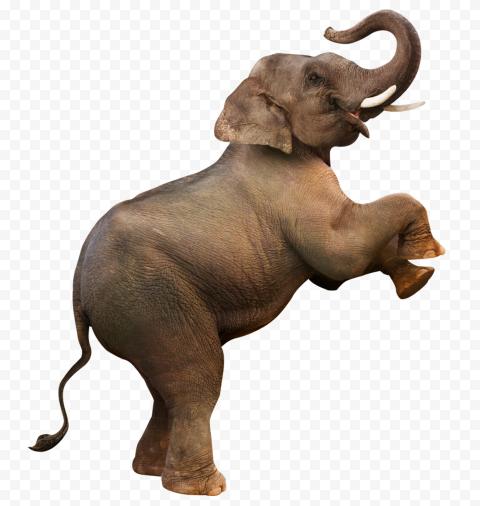
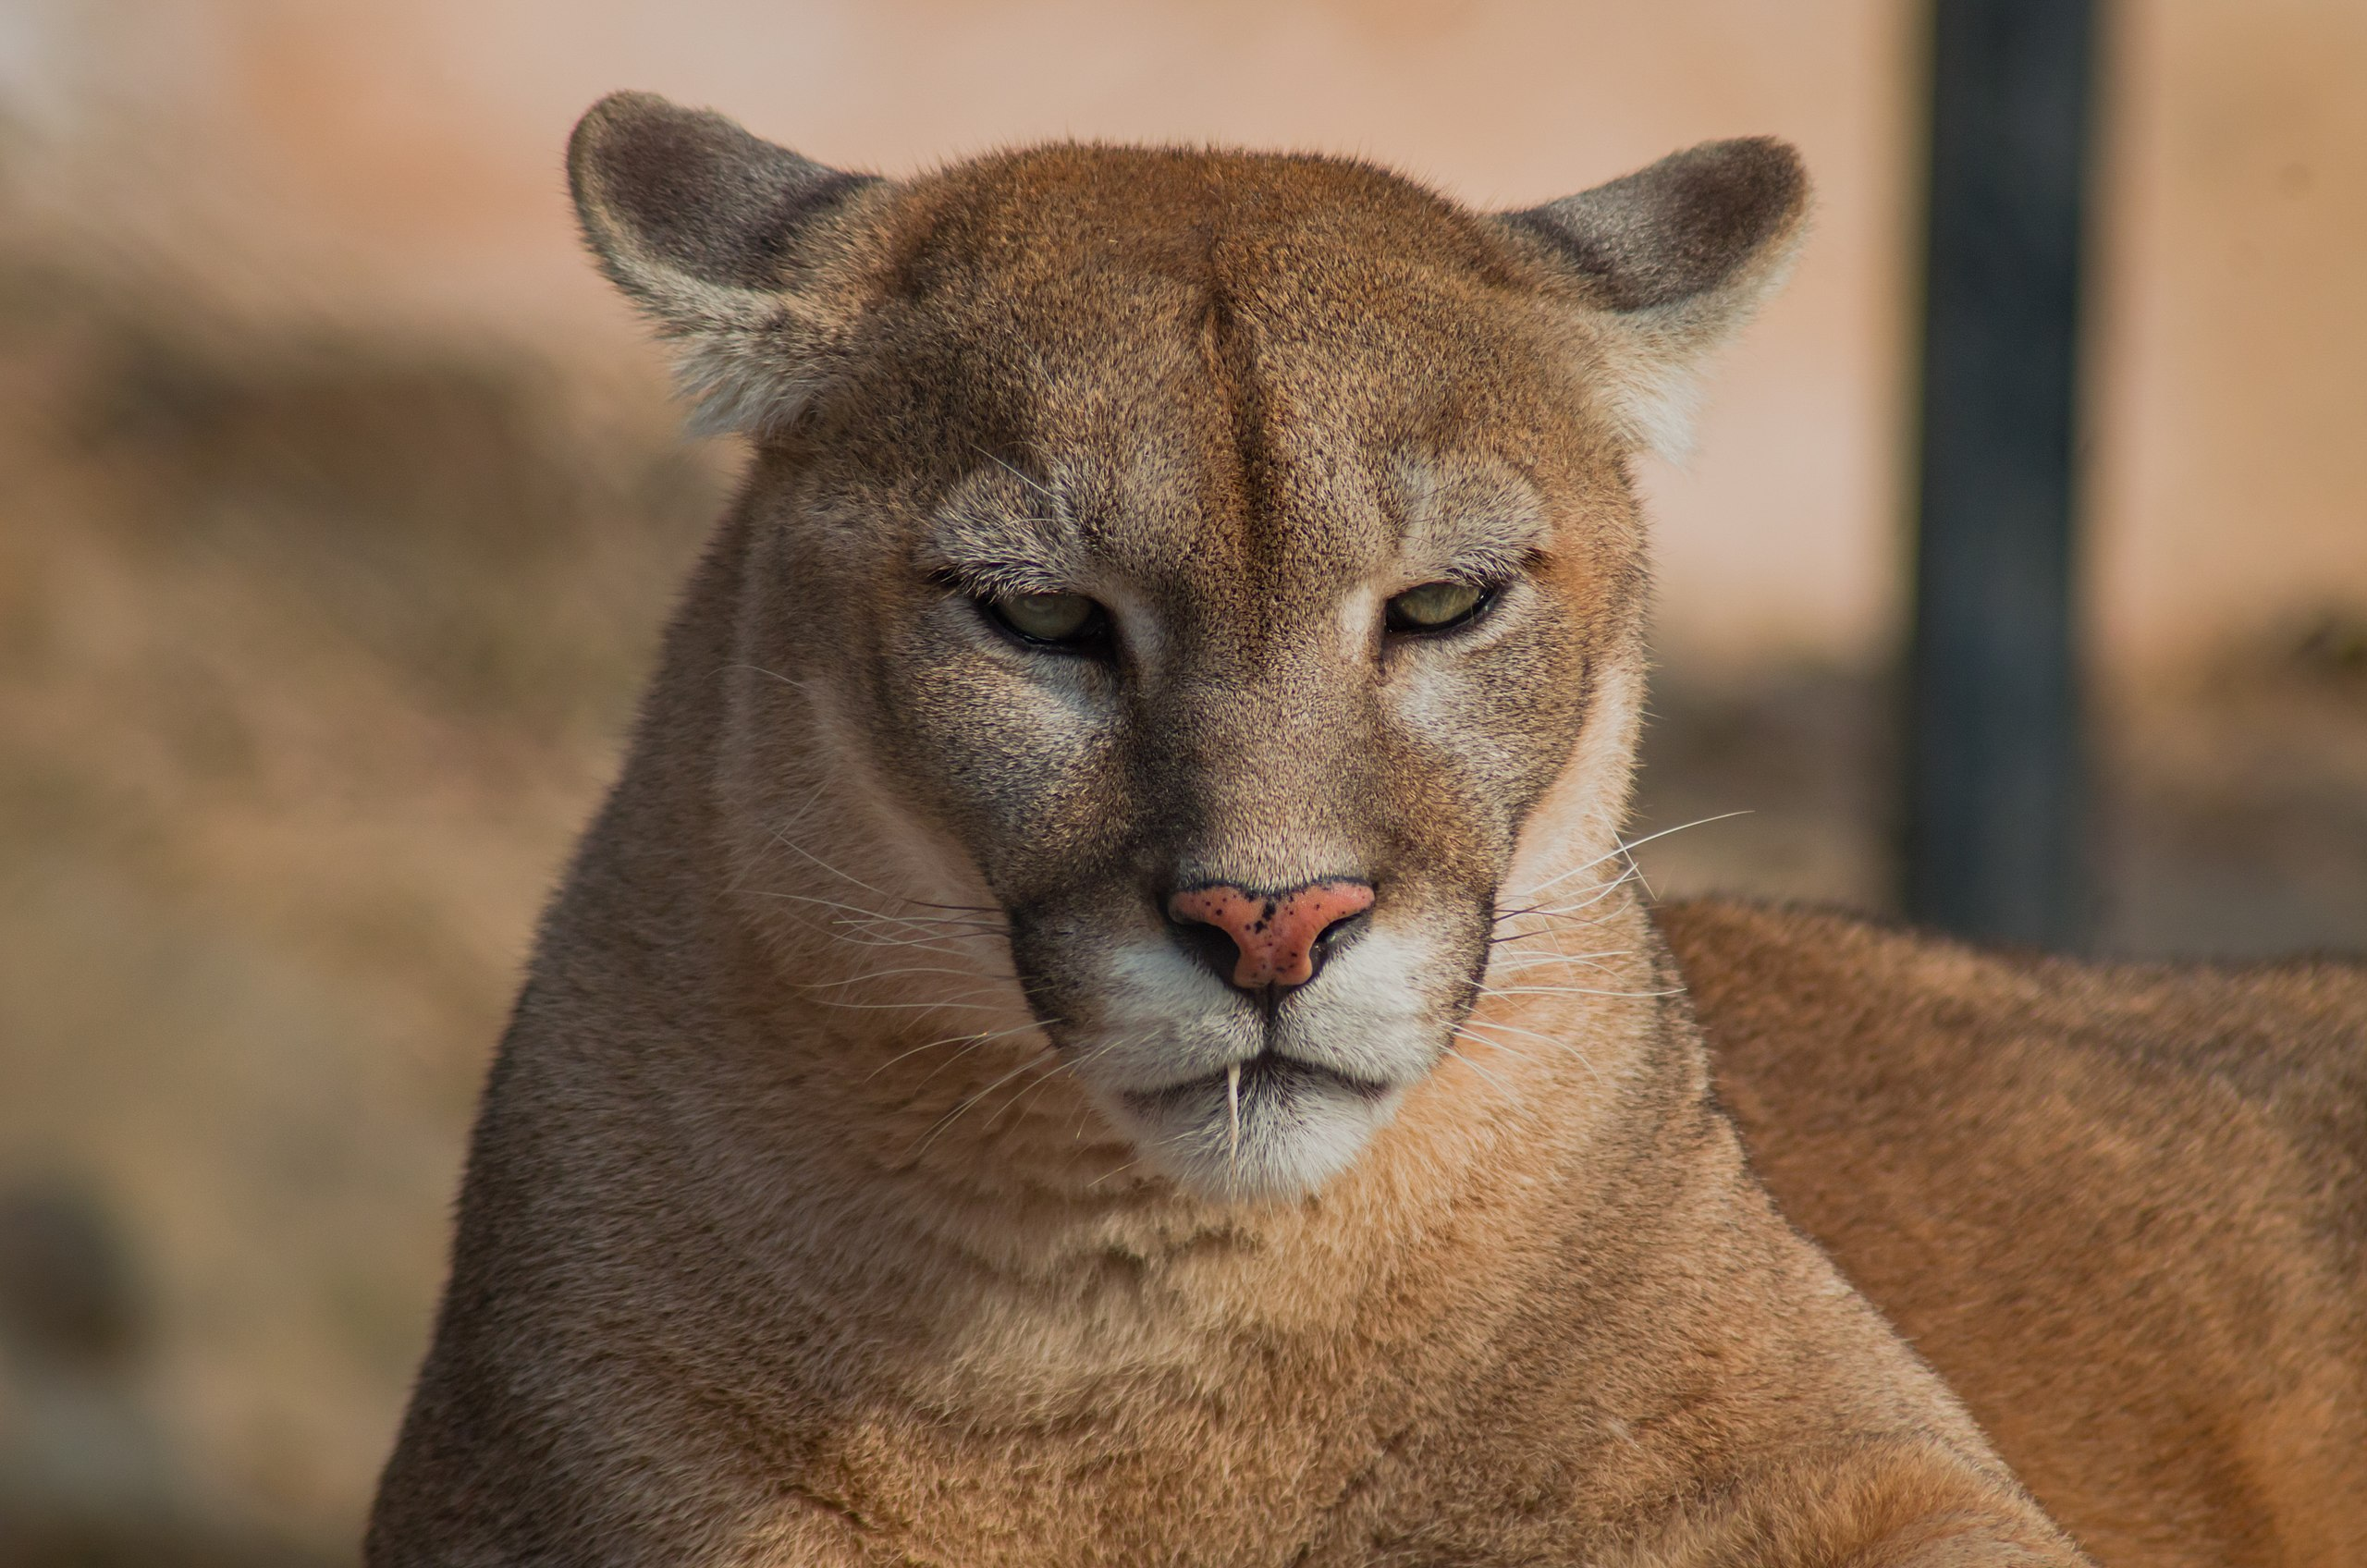
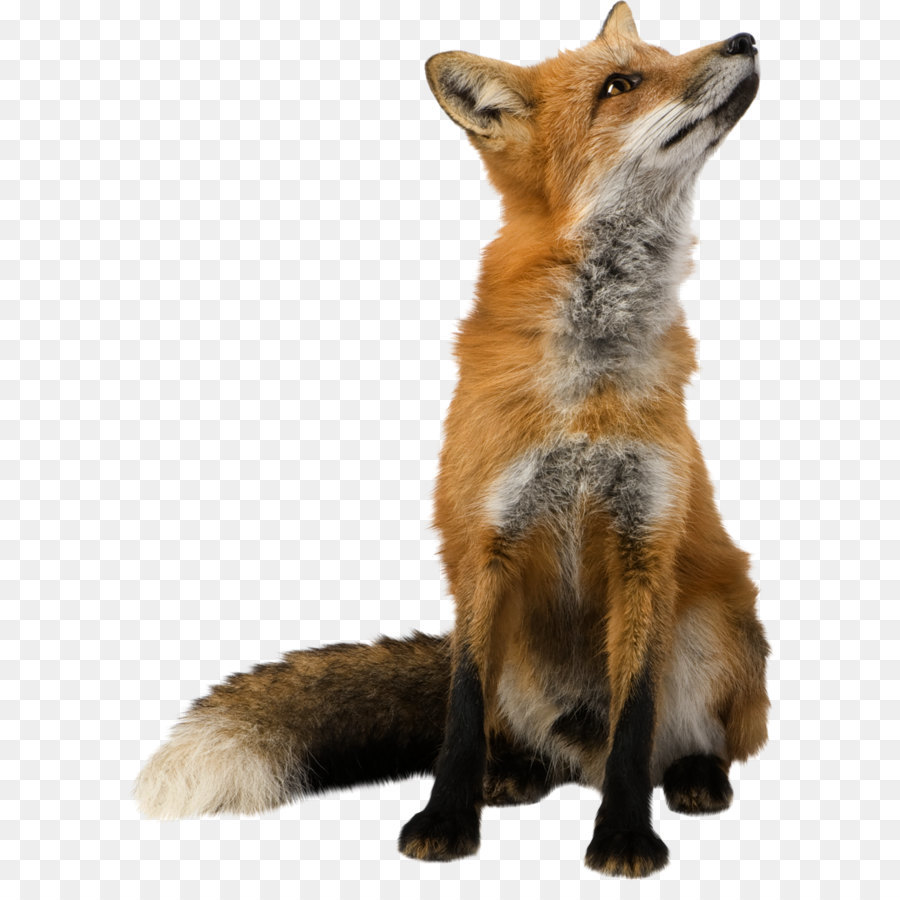
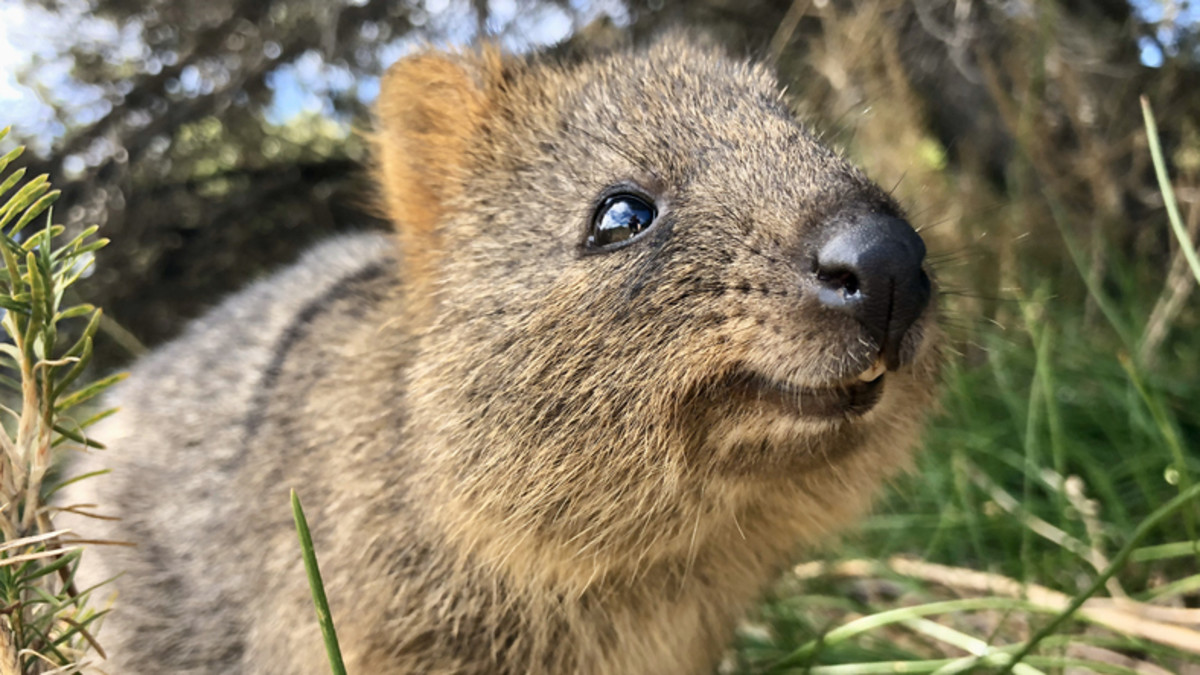
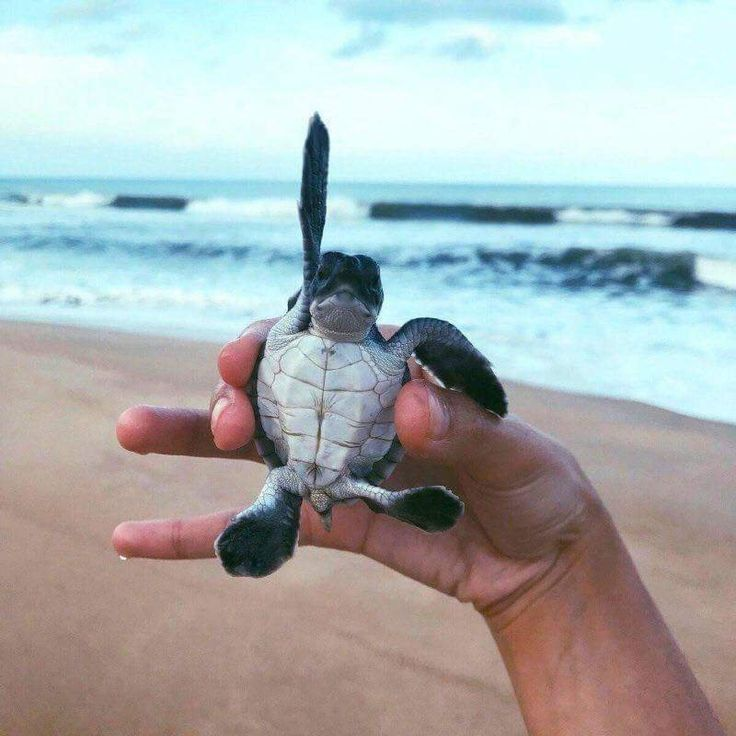
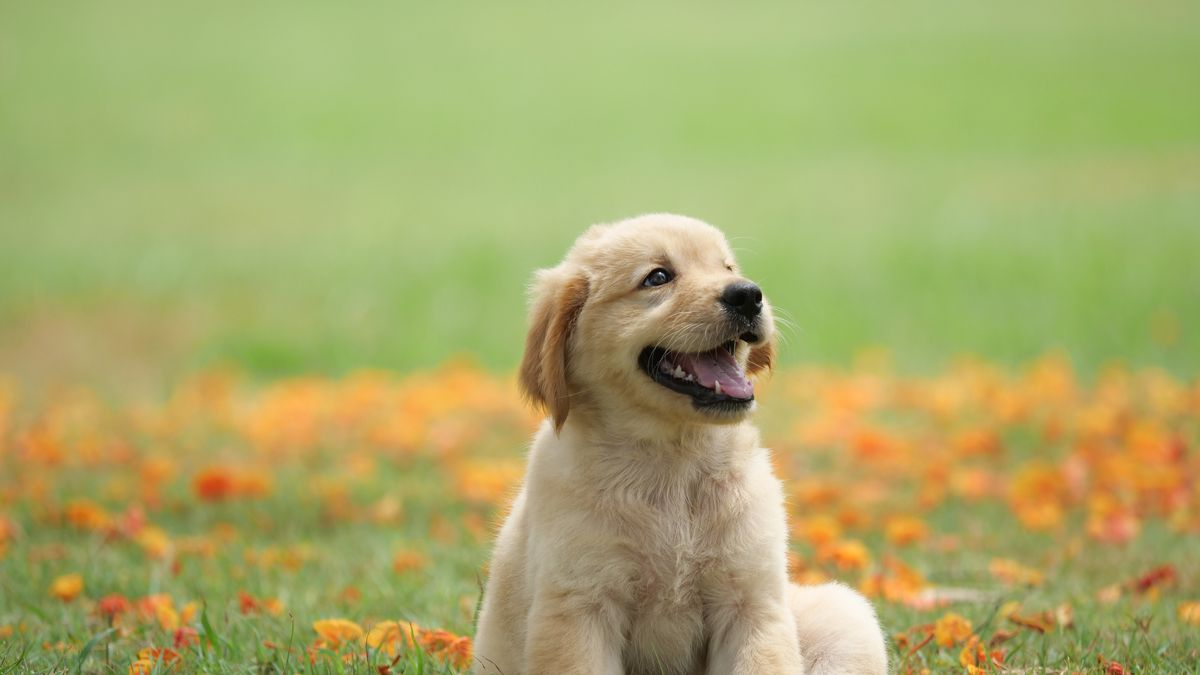
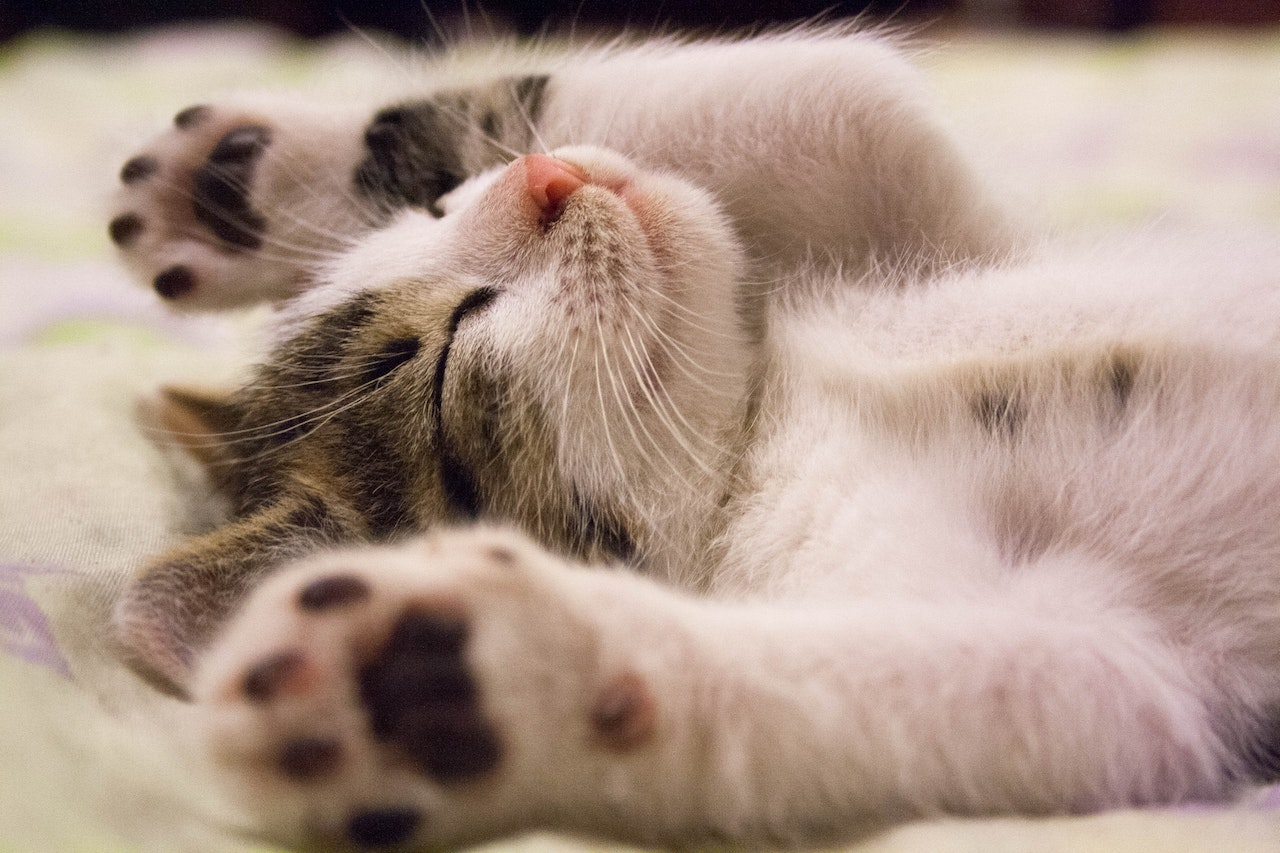
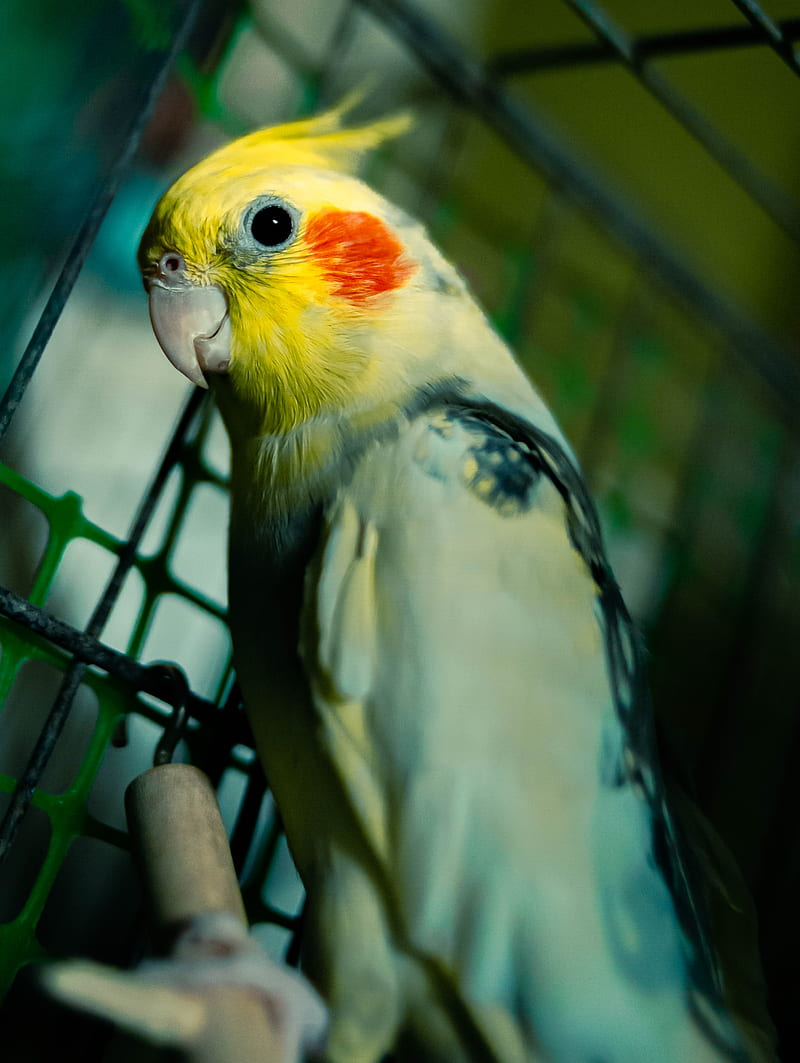

In [1]:
import os
import pandas as pd
import base64
from PIL import Image
from IPython.display import HTML
import re

def image_formatter(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
        return f'<img src="data:image/png;base64,{encoded_image}" width="100">'

def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else float('inf')

def process_images(folder_path):
    columns = ['File Name', 'Color Mode', 'Format', 'Channels', 'File Size (MB)',
               'Width', 'Height', 'Full Path', 'Resized Image']
    df = pd.DataFrame(columns=columns)

    for filename in sorted(os.listdir(folder_path), key=extract_number):
        file_path = os.path.join(folder_path, filename)

        try:
            image = Image.open(file_path)
        except:
            continue

        file_size_mb = round(os.path.getsize(file_path) / (1024 * 1024), 2)
        resized_image = image.resize((100, 100))

        df = pd.concat([df, pd.DataFrame({
            'File Name': [filename],
            'Color Mode': [image.mode],
            'Format': [image.format],
            'Channels': [len(image.getbands())],
            'File Size (MB)': [file_size_mb],
            'Width': [image.width],
            'Height': [image.height],
            'Full Path': [file_path],
            'Resized Image': [resized_image]
        })], ignore_index=True)

    df.index = df.index + 1

    return df

folder_path = '/home/ayefimenko/Documents/Python/Lab4/images'
result_df = process_images(folder_path)

result_df['Resized Image'] = result_df['Full Path'].apply(image_formatter)
display(HTML(result_df.to_html(escape=False)))

**Завдання 2**
<br />Створити функцію, що в якості аргумента приймає:
<ul>
    <li>шлях до папки;</li>
    <li>назва вихідного зображення;</li>
    <li>кількість зображень в рядку;</li>
    <li>кількість зображень в стовпчику;</li>
</ul>
і повертає зображення постера.
Вважаємо, що постер є прямокутним і число картинок в постері a х b, де а – число стовпчиків, а b – число рядків.

In [2]:
import os
import random
from PIL import Image, ImageOps

def apply_random_filter(image, opacity=0.5):
    filters = ['RED', 'GREEN', 'BLUE', 'YELLOW', 'PURPLE', 'CYAN']
    selected_filter = random.choice(filters)

    if selected_filter == 'RED':
        filter_color = '#FF0000'
    elif selected_filter == 'GREEN':
        filter_color = '#00FF00'
    elif selected_filter == 'BLUE':
        filter_color = '#0000FF'
    elif selected_filter == 'YELLOW':
        filter_color = '#FFFF00'
    elif selected_filter == 'PURPLE':
        filter_color = '#800080'
    elif selected_filter == 'CYAN':
        filter_color = '#00FFFF'

    filter_image = ImageOps.colorize(image.convert('L'), filter_color, filter_color)

    blended_image = Image.blend(image, filter_image, opacity)

    return blended_image

def to_poster(folder_path, output_filename, columns, rows):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    selected_images = random.sample(image_files, columns * rows)
    poster = Image.new('RGB', (columns * 500, rows * 500))

    for i in range(rows):
        for j in range(columns):
            image_path = os.path.join(folder_path, selected_images[i * columns + j])
            original_image = Image.open(image_path)
            
            square_image = ImageOps.fit(original_image, (533, 533), method=0, bleed=0.0, centering=(0.5, 0.5))
            resized_image = square_image.resize((500, 500))
            
            filtered_image = apply_random_filter(resized_image)

            poster.paste(filtered_image, (j * 500, i * 500))

    poster_path = os.path.join('/home/ayefimenko/Documents/Python/Lab4', output_filename)
    poster.save(poster_path)
    
    return poster

In [3]:
# Test 1
img = to_poster('/home/ayefimenko/Documents/Python/Lab4/images', 'poster1.jpg', 2, 3)
img.show()

In [4]:
# Test 2
img = to_poster('/home/ayefimenko/Documents/Python/Lab4/images', 'poster2.png', 3, 3)
img.show()

## <a href="https://github.com/iayefimenko/Python_Lab4">Посилання</a> на створений блокнот Jupyter на GitHub

## Висновки
**Під час виконання лабораторної роботи №4 було ознайомлено з бібліотеками мови програмування Python Pillow та OpenCV. У ході розробки ПЗ було здобуто досвід роботи з обробки набору цифрових зображень. Також було покращено навички програмування та роботи з блокнотом в середовищі Jupyter Notebook. Отримані знання безсумнівно стануть в нагоді при більш детальному вивченні Python.**